<a href="https://colab.research.google.com/github/wlsisl/ESAA_/blob/main/%EC%BA%90%EA%B8%80%ED%95%84%EC%82%AC_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 캐글필사 - 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## 패션 MNIST 데이터셋 임포트하기

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋

-> 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


load_data() 함수 호출 : 네 개의 넘파이(NumPy) 배열이 반환

옷의 클래스는 총 10개이며 t-SHIRT, TROUSER, PULLOVER, dress, coat, sandal, shirt, sneaker, bag, ankle boot 이다.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리

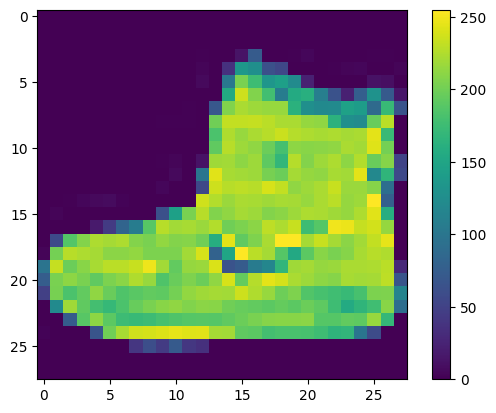

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입 전에 이 값의 범위를 0~1 사이로 조정한다.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

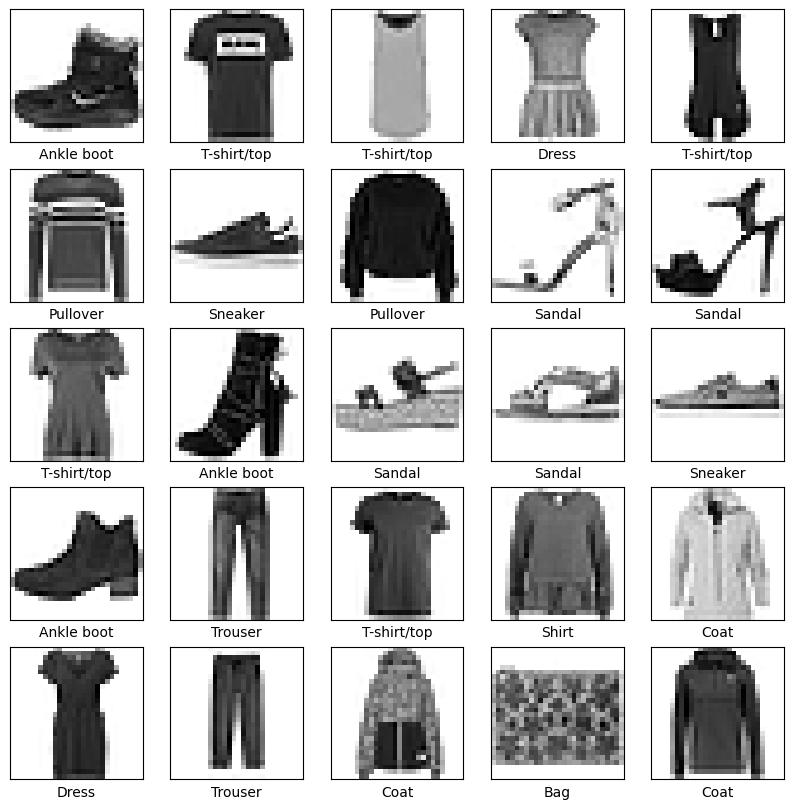

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 만들기 위해 모델 층을 구성한 다음 모델을 컴파일 한다.

신경망의 기본 빌딩 블록은 레이어이다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출한다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

이 네트워크 첫번째 층인 tk.keras.layers.Flatten은 2차원 배열의 이미지 포멧을 28*28=784 픽셀의 1차원 배열로 변환한다. 
이층은 이미지에 있는 픽셀의 행을 펼처서 일렬로 늘린다. 이층에는 ㅎ학습되는 가중치가 없고 데이터를 변환하기만한다.

\

픽셀을 펼친 후에 Dense로 층이 연속으로 연결된다. 이 층을 밀집연결, 완전 연결이라고 부른다.

마지막 층은 10개의 노드의 소프트 멕스 층이다. 이는 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 즉 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력하는 것이다.

## 모델 컴파일

* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정한다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 한다.

* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식이다.

* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용된다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용한다.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

1. 훈련 데이터를 모델에 주입한다. train_images, train_labels이다.

2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다.

3. 테스트 세트에 대한 모델의 예측을 만든다.

4. 예측이 test_labes배열의 레이블과 일치하는지 확인한다. 

## 모델 fit

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5012 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3761 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3383 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3130 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2956 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2825 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2602 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2476 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss:

## 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3419 - accuracy: 0.8833 - 638ms/epoch - 2ms/step

Test accuracy: 0.8833000063896179


테스트 세트의 정확도가 훈련 세트의 정확도보다 낮다.
훈련 세트의 정확도와 테스트 정확도 차이는 과대적합때문이다.

과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

## 예측하기 

sotfmax함수를 사용하여 확률로 변환한다.

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
#첫번째 예
predictions[0]

array([6.0677956e-09, 3.7541269e-11, 1.5896395e-11, 7.9417467e-10,
       2.4385506e-11, 4.2772117e-05, 2.1804001e-09, 5.4860446e-03,
       3.5011322e-08, 9.9447119e-01], dtype=float32)

10개의 숫자 배열로 나타난다. 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타낸다.

In [19]:
#가장 높은 신뢰도를 가진 레이
np.argmax(predictions[0]) 

9

In [20]:
test_labels[0]

9

두개가 일치한다. 잘 예측하였다.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


## 예측 확인

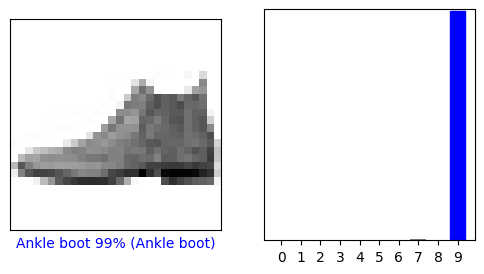

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

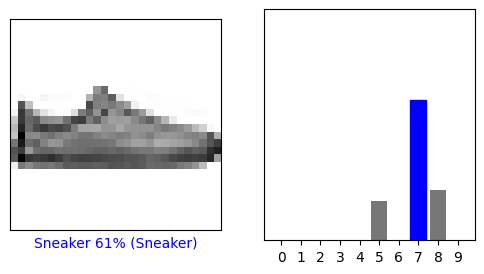

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

올바르게 예측된 레이블은 파란색이다. 

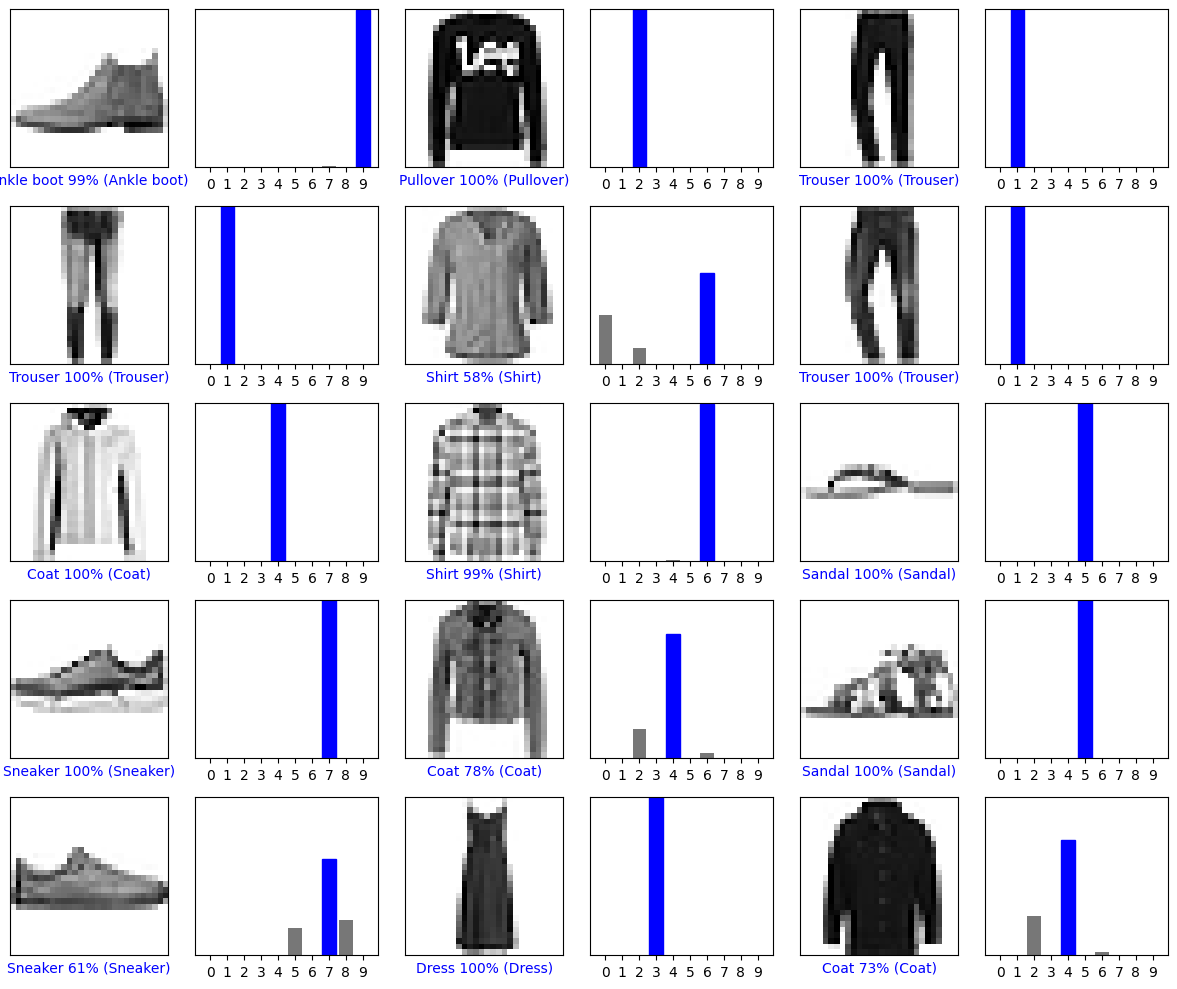

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras모델은 한 번에 샘플의 묶음 또는 배치로 예측을 만드는데 최적화되어있다.

하나의 이미지를 사용할 때에도 3차원 배열로 만들어야한다.

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[4.8394762e-05 3.0527921e-13 9.9858677e-01 7.7234358e-11 8.9358567e-04
  9.3801838e-14 4.7133025e-04 4.1604429e-16 5.7905551e-12 5.2369411e-12]]


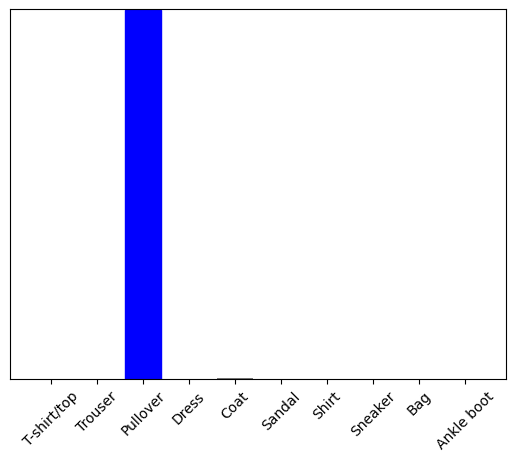

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2